# Demonstration of Team19 - Patapoufs&co package

In [1]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../app/")
from data_extraction import Data
from preprocessing import Preprocessing
from wavelength_alignment import WavelengthAlignment
from classification import Classifier
from data_augmentation import DataAugmentor
from visualization import Visualization
from interactive_visualization import InteractiveVisualization

/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# useful path and objects

data_path = "../test/data/test_dataset.csv"
output_path = "./output.csv"

import numpy as np
def little_endian(df):
    new_dtype = np.dtype([('flux', '<f4'), ('loglam', '<f4'), ('ivar', '<f4'),
                            ('and_mask', '<i4'), ('or_mask', '<i4'),
                            ('wdisp', '<f4'), ('sky', '<f4'), ('model', '<f4')])
    new_array = np.empty(df.shape, dtype=new_dtype)
    # Copy values from the original array to the new array
    for field in df.dtype.names:
        new_array[field] = df[field]
    return pd.DataFrame(new_array)

## data_extraction module

First we demonstrate the ability to extract spectral data using our data_extraction module

Import data from query

In [3]:
query = "SELECT TOP 10 * FROM SpecObj"

data = Data()
data.extract_from_query(query)

# access the reseult using the data attribute
data.data.head(5)

/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:680: RuntimeWarning: overflow encountered in conversion from string
  new_value = self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:672: RuntimeWarning: overflow encountered in conversion from string
  return self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


,specObjID,bestObjID,fluxObjID,targetObjID,plateID,sciencePrimary,sdssPrimary,legacyPrimary,seguePrimary,segue1Primary,...,elodieLogG,elodieFeH,elodieZ,elodieZErr,elodieZModelErr,elodieRChi2,elodieDOF,htmID,loadVersion,img
0,299489677444933632,1237648720142401611,1237648720142401611,284722522357889,299489402567026688,1,1,1,0,0,...,0,0,0,0,0,0,0,10570144490904,11,inf
1,299489952322840576,1237650795146510627,1237650795146510627,284705867235602,299489402567026688,1,1,1,0,0,...,0,0,0,0,0,0,0,10552753791387,11,inf
2,299490227200747520,1237648720142532813,1237648720142532813,284722522489016,299489402567026688,1,1,1,0,0,...,0,0,0,0,0,0,0,10570081427970,11,inf
3,299490502078654464,1237650795146445031,1237650795146445031,284705867169913,299489402567026688,1,1,1,0,0,...,0,0,0,0,0,0,0,10570138933189,11,inf
4,299491051834468352,1237648720142401670,1237648720142401670,284722522357956,299489402567026688,1,1,1,0,0,...,0,0,0,0,0,0,0,10570175749746,11,inf


Import data from constraints

In [4]:
constrains = {"columns":["objid", "ra", "u", "g"],
                "database" : ["PhotoObj"],
                "constrain" : [("u", [0, 19.6]), ("g", [None, 20]), ("g", [0, None])]
            }

data = Data()
data.extract_from_constraints(constrains)

# access the reseult using the data attribute
data.data.head(5)

['(u BETWEEN 0 AND 19.6)', '(g < 20)', '(g > 0)']
WHERE (u BETWEEN 0 AND 19.6) AND (g < 20) AND (g > 0)
SELECT objid, ra, u, g FROM PhotoObj WHERE (u BETWEEN 0 AND 19.6) AND (g < 20) AND (g > 0)


,objid,ra,u,g
0,1237659150458224793,219.447858,19.36747,19.00917
1,1237659150458814491,221.448797,18.44982,17.31995
2,1237659150459273316,222.933773,19.29774,17.00463
3,1237659150459338810,223.297933,18.11808,17.06657
4,1237659150461370464,229.473133,18.23226,16.98892


Import data from a file

In [5]:
data = Data()
data.extract_from_file(data_path)

# access the reseult using the data attribute
data.data.head(5)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,6,94,430194949951088640,GALAXY,0.032125,382,51816,368
1,1237645879578460255,51.443695,1.270073,19.52808,17.96541,17.03493,16.53754,16.14154,94,301,6,512,466235292731336704,GALAXY,0.121315,414,51869,410
2,1237645879578460271,51.483584,1.272013,18.72268,17.38520,16.81134,16.51803,16.29502,94,301,6,512,466232818830174208,GALAXY,0.048765,414,51869,401
3,1237645941291614227,49.627485,-1.041769,17.65612,16.17133,15.58940,15.37850,15.26744,109,301,1,100,1705795582662043648,STAR,-0.000098,1515,52932,208
4,1237645941824356443,40.285690,-0.714957,17.54884,15.75164,15.03100,14.66728,14.36099,109,301,2,37,459394680333821952,GALAXY,0.040287,408,51821,100


Get spectra using data class

In [6]:
data = Data()
data.extract_from_query(query)

# get spectra for all the query result :
spectra = data.get_spectra_from_data()

spectra[0][1].data

/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:680: RuntimeWarning: overflow encountered in conversion from string
  new_value = self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:672: RuntimeWarning: overflow encountered in conversion from string
  return self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


FITS_rec([(22.707819, 3.5826, 0.06255807, 0,        0, 1.2344298 , 3.744135 , 25.398296),
          (22.281448, 3.5827, 0.05456647, 0,        0, 1.2341745 , 5.4818783, 24.118776),
          (21.349161, 3.5828, 0.04969592, 0,        0, 1.2339152 , 7.1170793, 22.798326),
          ...,
          (68.81269 , 3.9641, 0.27125168, 0,        0, 0.81538045, 2.74595  , 94.91044 ),
          (60.91903 , 3.9642, 0.2598727 , 0, 33554432, 0.81511146, 2.6884913, 94.91526 ),
          (53.371395, 3.9643, 0.32804474, 0, 33554432, 0.8148467 , 2.522145 , 94.92008 )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

For only one object id

In [7]:
data = Data()
data.extract_from_query(query)

# get spectra for all the query result :
obj_id= str(data.data["specObjID"][0])
spectra = data.get_spectra_from_obj_id(obj_id=obj_id)

spectra[0][1].data

/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:680: RuntimeWarning: overflow encountered in conversion from string
  new_value = self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:672: RuntimeWarning: overflow encountered in conversion from string
  return self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


FITS_rec([(22.707819, 3.5826, 0.06255807, 0,        0, 1.2344298 , 3.744135 , 25.398296),
          (22.281448, 3.5827, 0.05456647, 0,        0, 1.2341745 , 5.4818783, 24.118776),
          (21.349161, 3.5828, 0.04969592, 0,        0, 1.2339152 , 7.1170793, 22.798326),
          ...,
          (68.81269 , 3.9641, 0.27125168, 0,        0, 0.81538045, 2.74595  , 94.91044 ),
          (60.91903 , 3.9642, 0.2598727 , 0, 33554432, 0.81511146, 2.6884913, 94.91526 ),
          (53.371395, 3.9643, 0.32804474, 0, 33554432, 0.8148467 , 2.522145 , 94.92008 )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

Write data.data dataframe in a file

In [8]:
data.write_file(output_path)

concat 2 data objects

In [9]:
data = Data()
data.extract_from_query(query)

data2 = Data()
data2.extract_from_file(data_path)

data.concat(data2, axis=0)
data.data.head()

/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:680: RuntimeWarning: overflow encountered in conversion from string
  new_value = self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:672: RuntimeWarning: overflow encountered in conversion from string
  return self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


,specObjID,bestObjID,fluxObjID,targetObjID,plateID,sciencePrimary,sdssPrimary,legacyPrimary,seguePrimary,segue1Primary,...,g,r,i,run,rerun,camcol,field,specobjid,redshift,fiberid
0,2.994897e+17,1.237649e+18,1.237649e+18,2.847225e+14,2.994894e+17,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.994900e+17,1.237651e+18,1.237651e+18,2.847059e+14,2.994894e+17,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.994902e+17,1.237649e+18,1.237649e+18,2.847225e+14,2.994894e+17,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.994905e+17,1.237651e+18,1.237651e+18,2.847059e+14,2.994894e+17,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.994911e+17,1.237649e+18,1.237649e+18,2.847225e+14,2.994894e+17,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


merge 2 datasets

In [10]:
query = "SELECT TOP 10 * FROM SpecObj"
data = Data()
data.extract_from_query(query)

query2 = "SELECT TOP 20 * FROM SpecObj"
data2 = Data()
data2.extract_from_query(query2)

data.merge(data2, on_column="specObjID")
data.data

/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:680: RuntimeWarning: overflow encountered in conversion from string
  new_value = self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:672: RuntimeWarning: overflow encountered in conversion from string
  return self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:680: RuntimeWarning: overflow encountered in conversion from string
  new_value = self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:672: RuntimeWarni

,specObjID,bestObjID_x,fluxObjID_x,targetObjID_x,plateID_x,sciencePrimary_x,sdssPrimary_x,legacyPrimary_x,seguePrimary_x,segue1Primary_x,...,elodieLogG_y,elodieFeH_y,elodieZ_y,elodieZErr_y,elodieZModelErr_y,elodieRChi2_y,elodieDOF_y,htmID_y,loadVersion_y,img_y
0,299489677444933632,1237648720142401611,1237648720142401611,284722522357889,299489402567026688,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,10570144490904,11,inf
1,299489952322840576,1237650795146510627,1237650795146510627,284705867235602,299489402567026688,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,10552753791387,11,inf
2,299490227200747520,1237648720142532813,1237648720142532813,284722522489016,299489402567026688,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,10570081427970,11,inf
3,299490502078654464,1237650795146445031,1237650795146445031,284705867169913,299489402567026688,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,10570138933189,11,inf
4,299491051834468352,1237648720142401670,1237648720142401670,284722522357956,299489402567026688,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,10570175749746,11,inf
5,299491326712375296,1237648720142532891,1237648720142532891,284722522489067,299489402567026688,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,10570079934268,11,inf
6,299491601590282240,0,0,284705867301452,299489402567026688,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,10570065921515,11,inf
7,299491876468189184,1237650795146510903,1237650795146510903,284705867235621,299489402567026688,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,10570136564158,11,inf
8,299492151346096128,1237648720142401774,1237648720142401774,284722522358020,299489402567026688,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,10570143152853,11,inf
9,299492426224003072,1237650795146576091,1237650795146576091,284705867300976,299489402567026688,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,10552984738076,11,inf


## wavelength_alignment module

After extracting data for spectral object(s), we can align their wavelengths to a specified range

WavelengthAlignment.align() function

In [11]:
# get spectral data
query = "SELECT TOP 10 * FROM SpecObj"
data = Data()
data.extract_from_query(query)

# get the first two object ids as a list
object_ids = list(data.data["specObjID"][:2].values)

# desired range for (log) wavelengths
min_val = 3.2
max_val = 3.7
num_points = 500

# align wavelengths with our module
aligned_df = WavelengthAlignment.align(object_ids=object_ids, min_val=min_val, max_val=max_val,
                                                    num_points=num_points)
aligned_df.head()

/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:680: RuntimeWarning: overflow encountered in conversion from string
  new_value = self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:672: RuntimeWarning: overflow encountered in conversion from string
  return self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


,flux_299489677444933632,flux_299489952322840576,loglam
0,1655.677990,-11144.772333,3.200000
1,1651.401351,-11115.580903,3.201002
2,1647.124711,-11086.389474,3.202004
3,1642.848072,-11057.198044,3.203006
4,1638.571433,-11028.006615,3.204008


## preprocessing module

We can also preprocess the extracted data

Preprocessing.normalize() function

In [12]:
query="SELECT TOP 10 * FROM SpecObj"

data = Data()
data.extract_from_query(query)
df = data.get_spectra_from_data()
df = pd.DataFrame(df[0][1].data)
std_data = Preprocessing.normalize(data=df)
std_data.head()

/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:680: RuntimeWarning: overflow encountered in conversion from string
  new_value = self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:672: RuntimeWarning: overflow encountered in conversion from string
  return self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


,flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
0,-2.909892,-1.731596,-2.527354,-0.029747,-0.127009,2.669790,-0.307672,-2.793063
1,-2.930908,-1.730690,-2.669017,-0.029747,-0.127009,2.667045,-0.235571,-2.856678
2,-2.976861,-1.729783,-2.755354,-0.029747,-0.127009,2.664258,-0.167725,-2.922328
3,-3.224275,-1.728875,-2.758882,-0.029747,-0.127009,2.661453,-0.102827,-2.976660
4,-2.711315,-1.727968,-2.802276,-0.029747,-0.127009,2.658577,-0.042804,-3.025046


Preprocessing.remove_outliers() function

In [13]:
data = Data()
data.extract_from_query(query)
df = data.get_spectra_from_data()[0][1].data

# some computers use little Endian and this generates errors
#to solve this
df = little_endian(df)



clean_data = Preprocessing.remove_outliers(df)
clean_data.head()

/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:680: RuntimeWarning: overflow encountered in conversion from string
  new_value = self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:672: RuntimeWarning: overflow encountered in conversion from string
  return self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


,flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
265,44.583313,3.6091,0.104027,0,0,1.167660,11.106986,42.555820
266,49.274651,3.6092,0.099854,0,0,1.167415,11.816799,43.572079
268,43.291042,3.6094,0.111439,0,0,1.166924,10.304128,43.771465
269,46.737633,3.6095,0.110132,0,0,1.166682,9.849131,44.773197
270,43.603111,3.6096,0.114496,0,0,1.166430,11.207381,45.171253


Preprocessing.correct_redshift() function

In [14]:
data = Data()
data.extract_from_query(query)
spectra = data.get_spectra_from_data()
df = pd.DataFrame(spectra[0][1].data)
clean_data = Preprocessing.correct_redshift(data=df, redshift=10)

# now there is a "corrected_loglam" column
clean_data

/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:680: RuntimeWarning: overflow encountered in conversion from string
  new_value = self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:672: RuntimeWarning: overflow encountered in conversion from string
  return self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


,flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model,corrected_loglam
0,22.707819,3.5826,0.062558,0,0,1.234430,3.744135,25.398296,1.184705
1,22.281448,3.5827,0.054566,0,0,1.234174,5.481878,24.118776,1.184805
2,21.349161,3.5828,0.049696,0,0,1.233915,7.117079,22.798326,1.184905
3,16.329691,3.5829,0.049497,0,0,1.233654,8.681221,21.705524,1.185005
4,26.736506,3.5830,0.047049,0,0,1.233387,10.127877,20.732317,1.185105
...,...,...,...,...,...,...,...,...,...
3813,84.350082,3.9639,0.189927,0,0,0.815908,2.869517,94.900810,1.566005
3814,76.041092,3.9640,0.227251,0,0,0.815645,2.845674,94.905624,1.566105
3815,68.812691,3.9641,0.271252,0,0,0.815380,2.745950,94.910439,1.566205
3816,60.919029,3.9642,0.259873,0,33554432,0.815111,2.688491,94.915260,1.566305


There is also an Preprocessing.interpolate function (see documentation) that is used as an auxiliary function for wavelength_alignment module.

## data_augmentation module

 DataAugmentor.compute_derivative() function

In [15]:
# TODO

## visualization module

We can plot spectral data after extraction, or after any wavelength alignment or preprocessing steps

Plot a single raw spectra

In [16]:
query="SELECT TOP 10 * FROM SpecObj"

# get spectral data using data_extraction module
data = Data()
data.
extract_from_query(query)
df = data.get_spectra_from_data()
df = pd.DataFrame(df[0][1].data)

# we can plot the raw spectral data
fig = Visualization.plot(df, y_column="flux")

SyntaxError: invalid syntax (3848012929.py, line 5)

Plot multiple aligned spectra

In [ ]:
# get the first two object ids as a list
object_ids = list(data.data["specObjID"][:3])

# desired range for (log) wavelengths
min_val = 3.5
max_val = 3.7
num_points = 500

# align wavelengths using our module
df_aligned = WavelengthAlignment.align(object_ids=object_ids, min_val=min_val, max_val=max_val,
                                                    num_points=num_points)


# plot the aligned spectra
fig,ax = plt.subplots()
fig = Visualization.plot(df_aligned, y_column=f"flux_{object_ids[0]}", figax=(fig,ax))
fig = Visualization.plot(df_aligned, y_column=f"flux_{object_ids[2]}", figax=(fig,ax))


Plot multiple aligned and preprocessed spectra

RuntimeError: array type dtype('float64') not supported

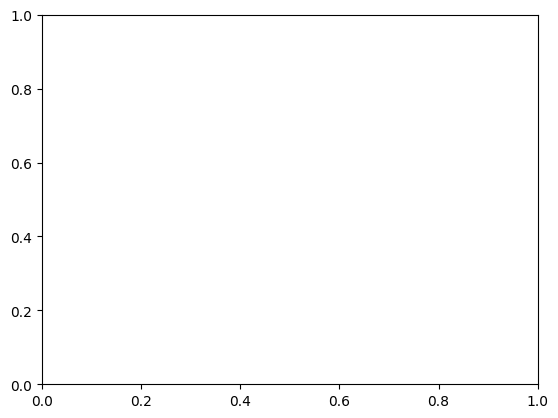

In [ ]:
# process the aligned spectra
clean_data = Preprocessing.normalize(data=df_aligned)
clean_data = Preprocessing.remove_outliers(data=clean_data)
clean_data = Preprocessing.correct_redshift(data=clean_data, redshift=10)

# plot the processed spectra
fig,ax = plt.subplots()
fig = Visualization.plot(clean_data, y_column=f"flux_{object_ids[0]}", figax=(fig,ax))
fig = Visualization.plot(clean_data, y_column=f"flux_{object_ids[2]}", figax=(fig,ax))

## interactive_visualization module

We can do the same thing, but with interactive visualization!

In [17]:
%matplotlib widget

query="SELECT TOP 10 * FROM SpecObj"

# get spectral data using data_extraction module
data = Data()
data.extract_from_query(query)
df = data.get_spectra_from_data()
df = pd.DataFrame(df[0][1].data)

# create interactive plot of spectra
# user can drag a span over the plot, and the plot will update to display total flux in the span
span = InteractiveVisualization.plot(df, y_column="flux")

ModuleNotFoundError: No module named 'ipympl'

## classification module

Three different scikit-learn classifiers may be accessed: LogisticRegression, KNeighborsClassifier, and RandomForestClassifier.

In [19]:
query= "SELECT TOP 20 SpecObjID, ra,dec,z, run2d, class FROM SpecObj"
data = Data()
data.extract_from_query(query)

# align spectra 
min_val = 1
max_val = 3
object_ids = list(data.data['SpecObjID'])
num_points = 5
aligned_spectra = WavelengthAlignment.align(object_ids, min_val, max_val, num_points)

# drop IDs
metadata = data.data.drop(columns = ['SpecObjID'])

X, y = Classifier.data_for_classifier(metadata, merge_data=aligned_spectra)

# normalize data
X = Preprocessing.normalize(data=X)

# perform object prediction
classifier = Classifier('LogisticRegression')
classifier.fit(X,y)
y_pred = classifier.predict(X)
pd.DataFrame(zip(y_pred, y), columns = ['Predicted class', 'True class'])[:15]

/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:680: RuntimeWarning: overflow encountered in conversion from string
  new_value = self.func(value)
/Users/alexandraramassamy/Library/Python/3.9/lib/python/site-packages/numpy/lib/_iotools.py:672: RuntimeWarning: overflow encountered in conversion from string
  return self.func(value)


,Predicted class,True class
0,GALAXY,GALAXY
1,GALAXY,GALAXY
2,GALAXY,QSO
3,GALAXY,GALAXY
4,GALAXY,GALAXY
5,GALAXY,GALAXY
6,QSO,QSO
7,GALAXY,GALAXY
8,GALAXY,GALAXY
9,GALAXY,GALAXY


In [20]:
# show predicted probabilities
print('Predicted probabilities according to classifier:')
pd.DataFrame(classifier.predict_proba(X), columns=['GALAXY', 'QSO', 'STAR'])[:10]

Predicted probabilities according to classifier:


,GALAXY,QSO,STAR
0,0.979223,0.020015,0.000763
1,0.928442,0.022120,0.049439
2,0.565307,0.431253,0.003440
3,0.988087,0.009455,0.002459
4,0.986201,0.011595,0.002204
5,0.764401,0.071702,0.163898
6,0.039514,0.956698,0.003788
7,0.896604,0.095249,0.008147
8,0.958565,0.038848,0.002588
9,0.841315,0.044250,0.114435


In [21]:
# accuracy score of classifier:
print('The Logistic Regression accuracy is:',classifier.score(X,y))


The Logistic Regression accuracy is: 0.95


In [22]:
print('Confusion matrix:')
pd.DataFrame(classifier.confusion_matrix(y, y_pred), 
             columns=['True galaxy', 'True QSO','True star'],
             index=['Pred galaxy', 'Pred QSO', 'Pred star'])

Confusion matrix:


,True galaxy,True QSO,True star
Pred galaxy,16,0,0
Pred QSO,1,1,0
Pred star,0,0,2


It is also possible to use other classifiers:

In [23]:
# K-NEAREST NEIGHBORS
classifier = Classifier('KNeighborsClassifier', n_neighbors=5)
classifier.fit(X,y)
knn_pred = classifier.predict(X)
print("Accuracy using KNN classifier:",classifier.score(X,y))
print('Confusion matrix:')
pd.DataFrame(classifier.confusion_matrix(y, knn_pred), 
             columns=['True galaxy', 'True QSO','True star'],
             index=['Pred galaxy', 'Pred QSO', 'Pred star'])

Accuracy using KNN classifier: 0.8
Confusion matrix:


,True galaxy,True QSO,True star
Pred galaxy,16,0,0
Pred QSO,2,0,0
Pred star,2,0,0


In [24]:
# RANDOM FOREST
classifier = Classifier('RandomForestClassifier', n_estimators=50, criterion='gini')
classifier.fit(X,y)
rfc_pred = classifier.predict(X)
print("Accuracy using Random Forest classifier:",classifier.score(X,y))
print('Confusion matrix:')
pd.DataFrame(classifier.confusion_matrix(y, rfc_pred), 
             columns=['True galaxy', 'True QSO','True star'],
             index=['Pred galaxy', 'Pred QSO', 'Pred star'])

Accuracy using Random Forest classifier: 1.0
Confusion matrix:


,True galaxy,True QSO,True star
Pred galaxy,16,0,0
Pred QSO,0,2,0
Pred star,0,0,2
